In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename({"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, axis = 1, inplace = True)

In [6]:
df.describe()

,CustomerID,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.describe(include = "object")

,Gender
count,200
unique,2
top,Female
freq,112


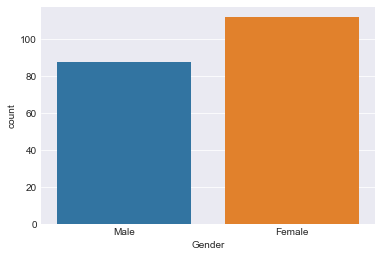

In [8]:
sns.countplot(df["Gender"])
plt.show()

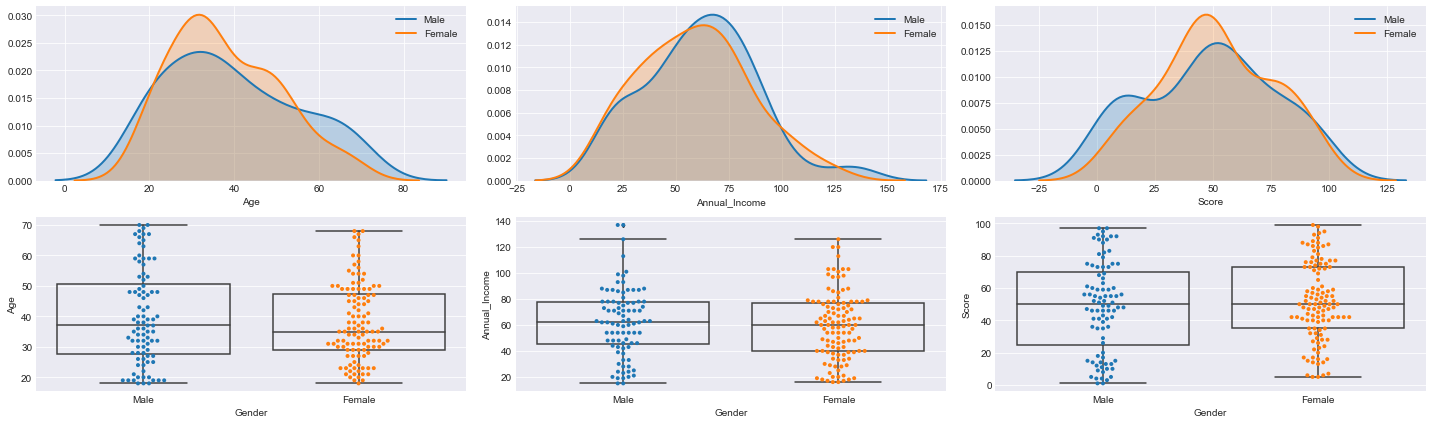

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (20, 6))
columns = ["Age", "Annual_Income", "Score"]
for col in range(3):
    sns.distplot(df[df["Gender"] == "Male"][columns[col]], hist = False, kde_kws = {"shade": True, "linewidth": 2}, label = "Male", ax = ax[0, col])
    sns.distplot(df[df["Gender"] == "Female"][columns[col]], hist = False, kde_kws = {"shade": True, "linewidth": 2}, label = "Female", ax = ax[0, col])
    sns.boxplot(x = "Gender", y = columns[col], data = df, fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Gender", y = columns[col], data = df, size = 4, ax = ax[1, col])
plt.tight_layout()
plt.show()

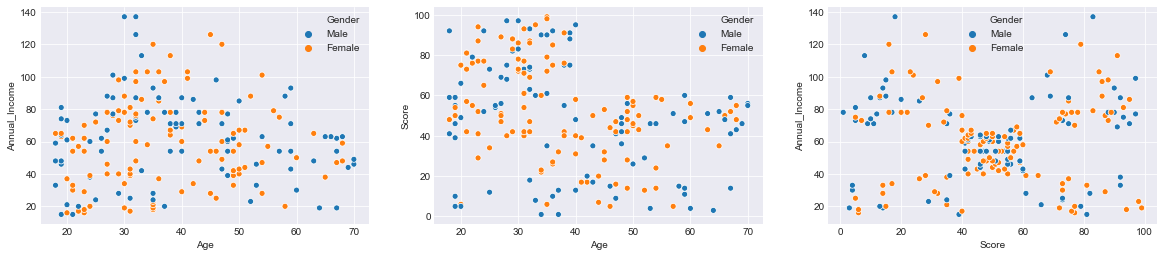

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))
sns.scatterplot(x = "Age", y = "Annual_Income", data = df, hue = "Gender", ax = ax[0])
sns.scatterplot(x = "Age", y = "Score", data = df, hue = "Gender", ax = ax[1])
sns.scatterplot(x = "Score", y = "Annual_Income", data = df, hue = "Gender", ax = ax[2])
plt.show()

In [11]:
# Algorithm
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch

# Model Selection
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Graph
from scipy.cluster.hierarchy import dendrogram

In [12]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [13]:
df = df.drop("CustomerID", axis = 1)

In [14]:
data = df.copy()

In [15]:
pca = PCA(n_components = 2)
data = pd.DataFrame(pca.fit_transform(data), columns = ["p1", "p2"])

In [16]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [17]:
algorithm = {
    "KMeans": KMeans(),
    "Affinity Propagation": AffinityPropagation(random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False),
    "Spectral Clustering": SpectralClustering(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "DBSCAN": DBSCAN(),
    "OPTICS": OPTICS(),
    "Birch": Birch(),
}

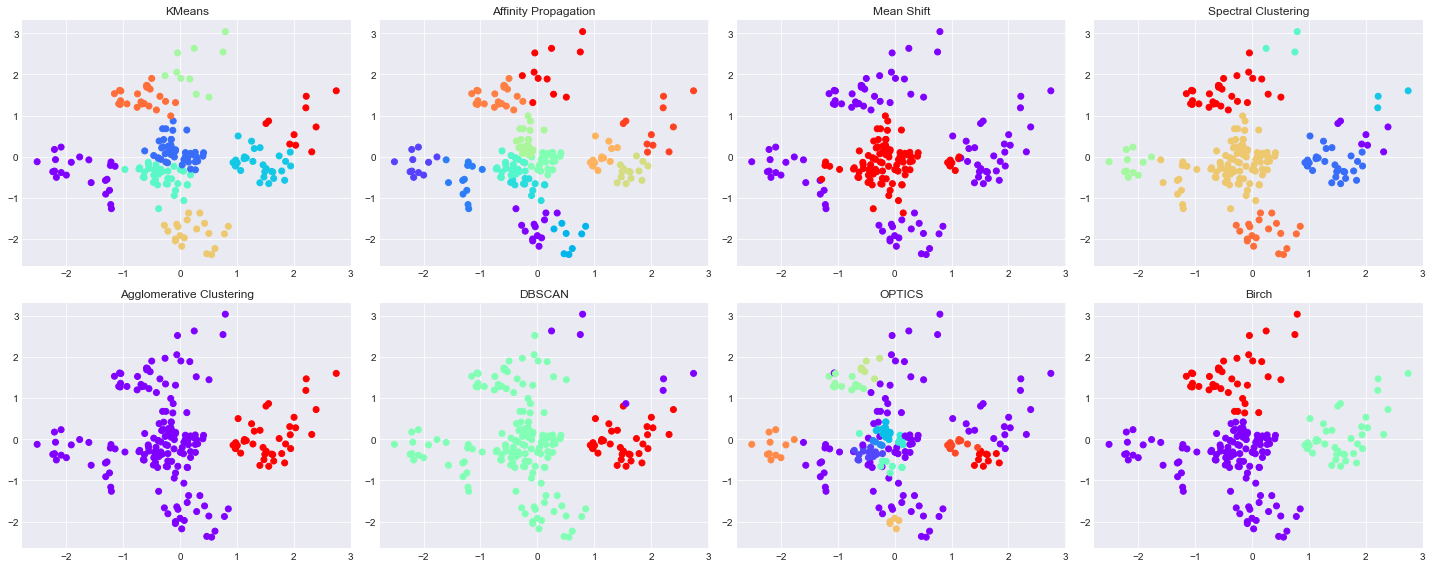

In [18]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()

In [19]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [20]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.455871,0.431854,0.199737,0.416794,0.379405,0.345062,-0.040584,0.451366
Calinski,251.030474,257.256795,3.443650,188.385072,85.155411,57.060514,13.884433,144.784754
Davies,0.753003,0.775278,6.423090,0.659604,0.854215,0.814377,3.314073,0.729474


**KMEANS**

In [21]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = KMeans(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
    inertia.append(model.inertia_)

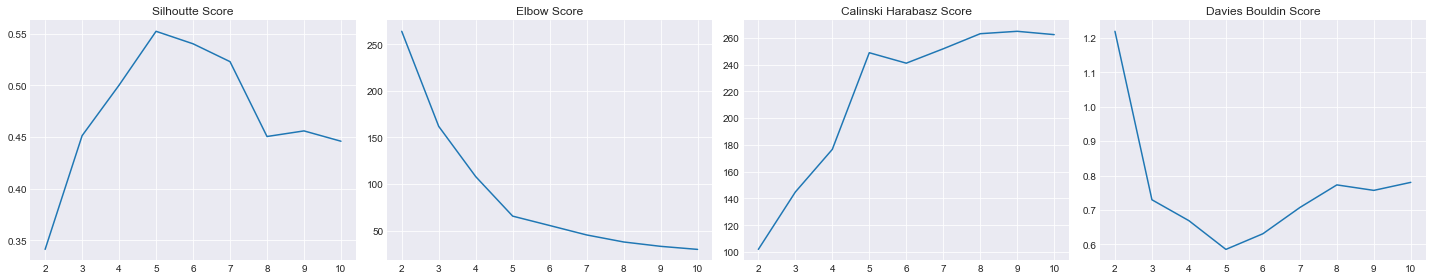

In [22]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
sns.lineplot(x = range(2, 11), y = inertia, ax = ax[1]); ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AFFINITY PROPAGATION**

In [23]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.5, 0.9, 10)):
    model = AffinityPropagation(damping = clu, random_state = 0)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))

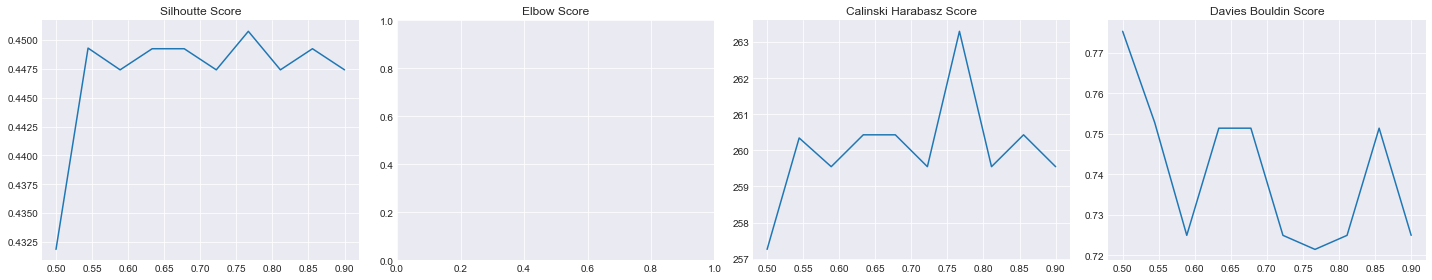

In [24]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**MEAN SHIFT**

In [25]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.5, 0.9, 10)):
    model = MeanShift(cluster_all = False, bandwidth = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

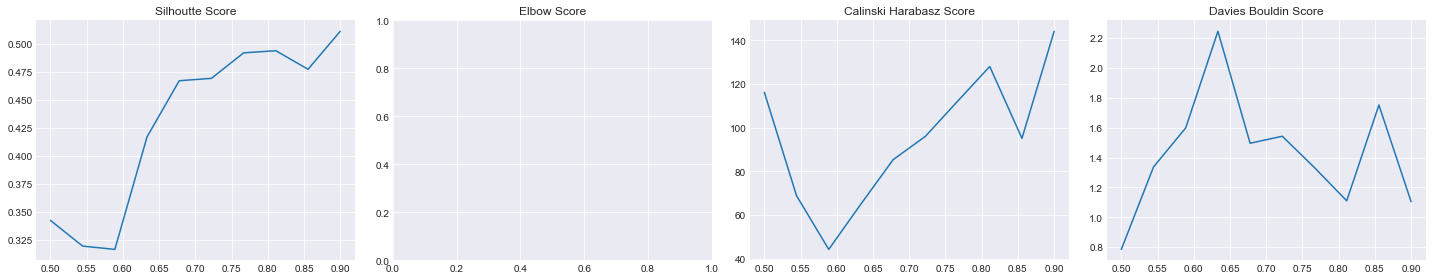

In [26]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**SPECTRAL CLUSTERING**

In [27]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = SpectralClustering(n_clusters = clu, n_neighbors = clu * 2)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

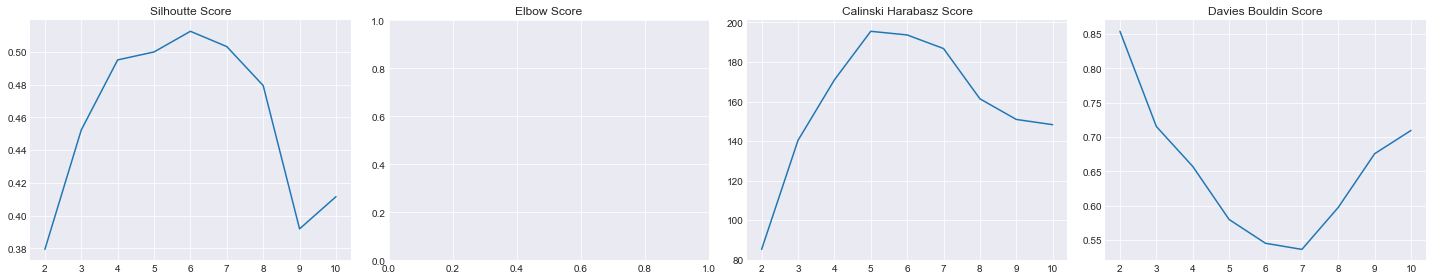

In [28]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AGGLOMERATIVE CLUSTERING**

In [29]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = AgglomerativeClustering(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

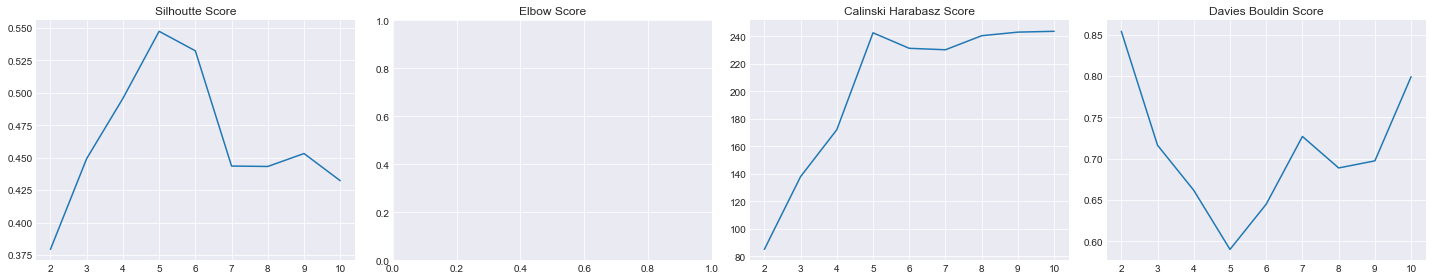

In [30]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

In [31]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

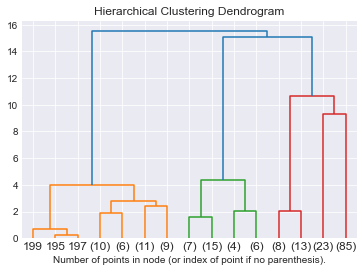

In [32]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**DBSCAN**

In [33]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.1, 0.6, 6)):
    model = DBSCAN(eps = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

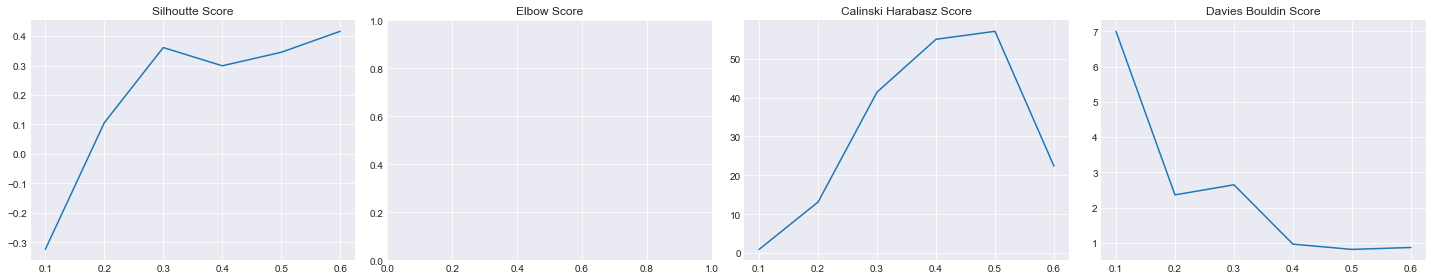

In [34]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 0.6, 6)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 0.6, 6)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 0.6, 6)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**OPTICS**

In [35]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(1, 10, 10)):
    model = OPTICS(eps = clu, leaf_size = clu * 10)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

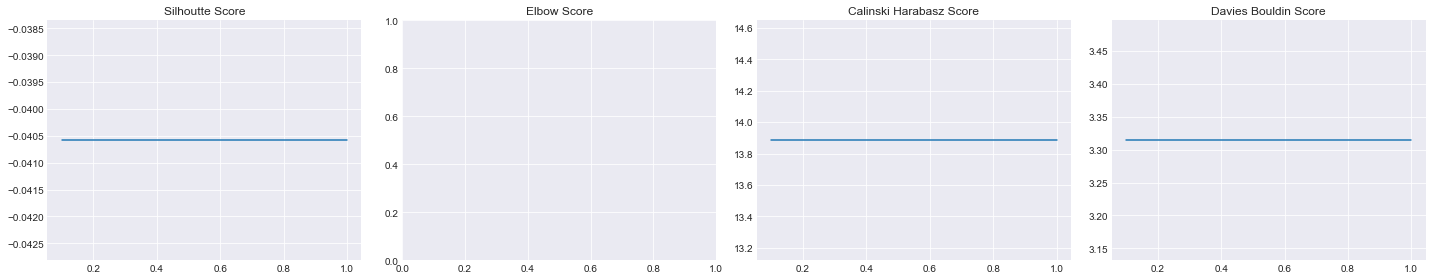

In [36]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**BIRCH**

In [37]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = Birch(n_clusters = clu, threshold = 0.3)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

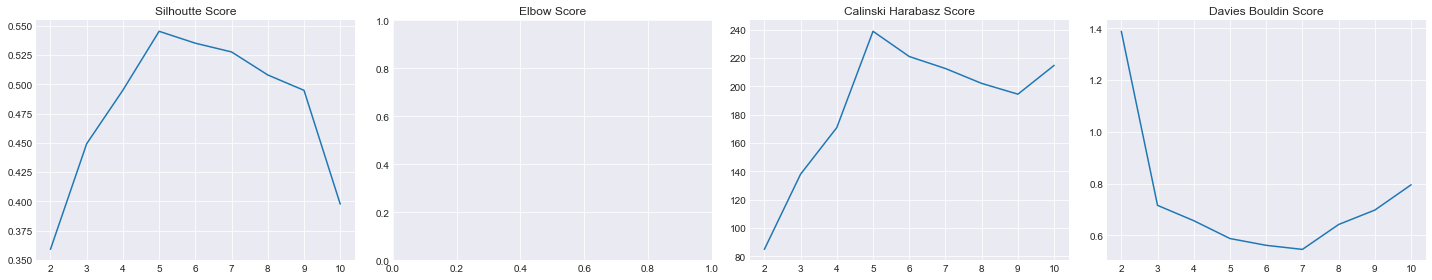

In [38]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**FINAL CHECK**

In [39]:
algorithm = {
    "KMeans": KMeans(n_clusters = 5),
    "Affinity Propagation": AffinityPropagation(damping = 0.77, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False, bandwidth = 0.8),
    "Spectral Clustering": SpectralClustering(n_clusters = 6, n_neighbors = 12),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters = 5),
    "DBSCAN": DBSCAN(eps = 0.4),
    "OPTICS": OPTICS(),
    "Birch": Birch(n_clusters = 5, threshold = 0.3)
}

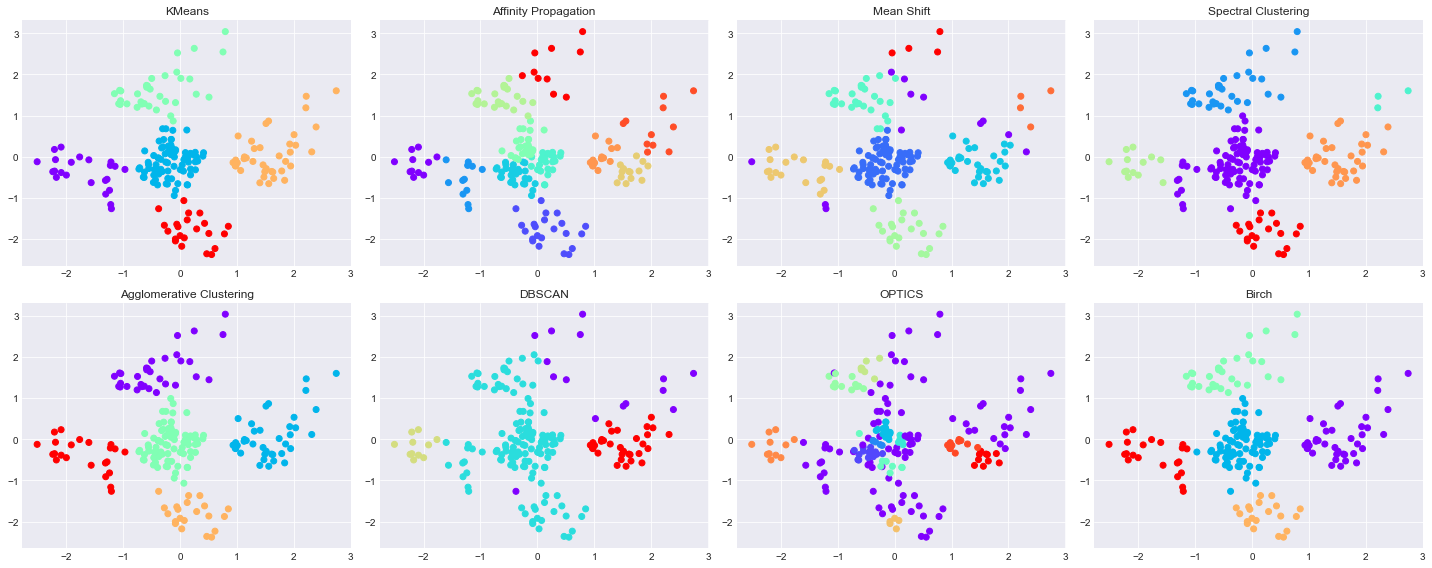

In [40]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_clustering_mall_cust.png')

In [41]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [42]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.552325,0.450767,0.503434,0.512540,0.547316,0.299221,-0.040584,0.545371
Calinski,248.863654,263.300168,121.080184,193.687731,242.497935,55.005537,13.884433,238.878468
Davies,0.585171,0.721451,1.389992,0.544964,0.590167,0.963682,3.314073,0.588159
